#  Aircraft Accidents, Failures & Hijacks Dataset

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/aircraft-accidents-failures-hijacks-dataset/Aircraft_Incident_Dataset.csv


In [2]:
dataset = pd.read_csv('/kaggle/input/aircraft-accidents-failures-hijacks-dataset/Aircraft_Incident_Dataset.csv')
dataset.head()

,Incident_Date,Aircaft_Model,Aircaft_Registration,Aircaft_Operator,Aircaft_Nature,Incident_Category,Incident_Cause(es),Incident_Location,Aircaft_Damage_Type,Date,...,Onboard_Crew,Onboard_Passengers,Onboard_Total,Fatalities,Aircaft_First_Flight,Aircraft_Phase,Departure_Airport,Destination_Airport,Ground_Casualties,Collision_Casualties
0,03-JAN-2022,British Aerospace 4121 Jetstream 41,ZS-NRJ,SA Airlink,Domestic Non Scheduled Passenger,Accident | repairable-damage,"Airplane - Engines, Airplane - Engines - Prop/...",near Venetia Mine...,Substantial,Monday 3 January 2022,...,Fatalities: 0 / Occupants: 3,Fatalities: 0 / Occupants: 4,Fatalities: 0 / Occupants: 7,0,1995-05-19 (26 years 8 months),Landing (LDG),Johannesburg-O.R. Tambo International Airport ...,"Venetia Mine Airport (FAVM) , South Africa",NaN,NaN
1,04-JAN-2022,British Aerospace 3101 Jetstream 31,HR-AYY,LANHSA,Domestic Scheduled Passenger,Accident | repairable-damage,"Airplane - Undercarriage, Airplane - Undercarr...",Roatán-Juan ...,Substantial,Tuesday 4 January 2022,...,Fatalities: 0 / Occupants:,Fatalities: 0 / Occupants:,Fatalities: 0 / Occupants: 19,0,1985,Landing (LDG),La Ceiba-Goloson International Airport (LCE/MH...,Roatán-Juan Manuel Gálvez International Airpor...,NaN,NaN
2,05-JAN-2022,Boeing 737-4H6,EP-CAP,Caspian Airlines,Domestic Scheduled Passenger,Accident | repairable-damage,"Airplane - Undercarriage, Airplane - Undercarr...",Isfahan-Shah...,Substantial,Wednesday 5 January 2022,...,Fatalities: 0 / Occupants:,Fatalities: 0 / Occupants:,Fatalities: 0 / Occupants: 116,0,1992-09-18 (29 years 4 months),Landing (LDG),"Mashhad Airport (MHD/OIMM) , Iran","Isfahan-Shahid Beheshti Airport (IFN/OIFM) , Iran",NaN,NaN
3,08-JAN-2022,Tupolev Tu-204-100C,RA-64032,"Cainiao, opb Aviastar-TU",Cargo,Accident | hull-loss,"Cargo - Fire/smoke, Result - Damaged on the gr...",Hangzhou-Xia...,Destroyed,Saturday 8 January 2022,...,Fatalities: 0 / Occupants: 8,Fatalities: 0 / Occupants: 0,Fatalities: 0 / Occupants: 8,0,2002-07-18 (19 years 6 months),Standing (STD),Hangzhou-Xiaoshan International Airport (HGH/Z...,"Novosibirsk-Tolmachevo Airport (OVB/UNNT) , Ru...",NaN,NaN
4,12-JAN-2022,Beechcraft 200 Super King Air,NaN,private,Illegal Flight,"Criminal occurrence (sabotage, shoot down) | h...",Result - Damaged on the ground,"Machakilha, ...",Damaged beyond repair,Wednesday 12 January 2022,...,Fatalities: 0 / Occupants: 0,Fatalities: 0 / Occupants: 0,Fatalities: 0 / Occupants: 0,0,NaN,Standing (STD),?,?,NaN,NaN


# DATA CLEANING

In [3]:
dataset.shape

(23519, 23)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23519 entries, 0 to 23518
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Incident_Date         23519 non-null  object
 1   Aircaft_Model         23519 non-null  object
 2   Aircaft_Registration  21958 non-null  object
 3   Aircaft_Operator      23519 non-null  object
 4   Aircaft_Nature        23519 non-null  object
 5   Incident_Category     23519 non-null  object
 6   Incident_Cause(es)    23519 non-null  object
 7   Incident_Location     22587 non-null  object
 8   Aircaft_Damage_Type   23519 non-null  object
 9   Date                  23519 non-null  object
 10  Time                  9203 non-null   object
 11  Arit                  23519 non-null  object
 12  Aircaft_Engines       10636 non-null  object
 13  Onboard_Crew          23519 non-null  object
 14  Onboard_Passengers    23519 non-null  object
 15  Onboard_Total         23519 non-null

In [5]:
dataset.describe()

,Fatalities
count,23519.000000
mean,5.611931
std,22.205937
min,0.000000
25%,0.000000
50%,0.000000
75%,4.000000
max,1692.000000


In [6]:
dataset.isnull().sum()

Incident_Date               0
Aircaft_Model               0
Aircaft_Registration     1561
Aircaft_Operator            0
Aircaft_Nature              0
Incident_Category           0
Incident_Cause(es)          0
Incident_Location         932
Aircaft_Damage_Type         0
Date                        0
Time                    14316
Arit                        0
Aircaft_Engines         12883
Onboard_Crew                0
Onboard_Passengers          0
Onboard_Total               0
Fatalities                  0
Aircaft_First_Flight     5488
Aircraft_Phase              0
Departure_Airport           0
Destination_Airport         0
Ground_Casualties       23172
Collision_Casualties    23227
dtype: int64

In [7]:
dataset.Aircaft_Registration.head(10)                              

0      ZS-NRJ
1      HR-AYY
2      EP-CAP
3    RA-64032
4         NaN
5      N760JB
6      C-GEAS
7      5H-TAZ
8      SP-402
9    RA-33599
Name: Aircaft_Registration, dtype: object

This is unique registration number given to each aircraft which can’t be impute and replace with any value, so we have to leave is NaN value.

In [8]:
dataset.Incident_Location.head(10)

0    near Venetia Mine...
1         Roatán-Juan ...
2         Isfahan-Shah...
3         Hangzhou-Xia...
4         Machakilha, ...
5         Hayden-Yampa...
6         Thunder Bay ...
7         New Fangak A...
8           Agok Airstrip
9    near Koryaki, Yel...
Name: Incident_Location, dtype: object

Location of incident also cannot be impute and replace with any value as location can be anywhere and can’t be predict or guess.

In [9]:
dataset.Time.head(10)

0        08:10
1     ca 12:00
2        17:07
3        04:40
4     c. 02:00
5     11:57 LT
6        12:22
7          NaN
8    ca. 09:00
9        12:22
Name: Time, dtype: object

Time is specific to the incident and this field also can’t be impute or guess and remain same as it is.

In [10]:
dataset.Aircaft_Engines.head(10)

0    2 Garrett TPE331-14GR-805H
1                           NaN
2              2 CFMI CFM56-3C1
3             2 Soloviev PS-90A
4                           NaN
5                2 IAE V2527-A5
6                           NaN
7                           NaN
8                           NaN
9                           NaN
Name: Aircaft_Engines, dtype: object

Engine used in particular aircraft vary from model to model and from airline to airline on what particular specification they have made the aircraft and hence this can also cannot be impute and replace and leave as NaN.

In [11]:
dataset.Aircaft_First_Flight.head(10)

0    1995-05-19  (26 years 8 months)
1                               1985
2    1992-09-18  (29 years 4 months)
3    2002-07-18  (19 years 6 months)
4                                NaN
5    2008-10-07  (13 years 4 months)
6                               1990
7                               2006
8                                NaN
9                               1988
Name: Aircaft_First_Flight, dtype: object

This field contains the information about the past, from where 1st flight of aircraft departed so again it cannot be imputed or replace and leave as NaN.

In [12]:
dataset.Ground_Casualties.isnull().sum()/len(dataset)*100

98.5245971342319

This field contains 98.52% null values, so we drop this column

In [13]:
dataset.Collision_Casualties.isnull().sum()/len(dataset)*100

98.75845061439688

This field contains 98.75% null values, so we drop this column.

In [14]:
dropped_dataset = dataset.drop (columns=['Ground_Casualties', 'Collision_Casualties'])

In [15]:
dropped_dataset.columns.tolist()

['Incident_Date',
 'Aircaft_Model',
 'Aircaft_Registration',
 'Aircaft_Operator',
 'Aircaft_Nature',
 'Incident_Category',
 'Incident_Cause(es)',
 'Incident_Location',
 'Aircaft_Damage_Type',
 'Date',
 'Time',
 'Arit',
 'Aircaft_Engines',
 'Onboard_Crew',
 'Onboard_Passengers',
 'Onboard_Total',
 'Fatalities',
 'Aircaft_First_Flight',
 'Aircraft_Phase',
 'Departure_Airport',
 'Destination_Airport']

In [16]:
weekday = ['Friday', 'Thursday', 'Wednesday', 'Tuesday', 'Monday', 'Saturday', 'Sunday']
incident_date_format = {'day': [], 'mon': [], 'year': [], 'day_name': []}
for d_date in dropped_dataset['Date']:
    d_date = d_date.split(' ')
    day_week = d_date[0]
    if day_week not in weekday:
        day_week = 'Unknown'
    incident_date_format['day_name'].append(day_week)

dropped_dataset['day_name'] = incident_date_format['day_name']
dropped_dataset.head()

,Incident_Date,Aircaft_Model,Aircaft_Registration,Aircaft_Operator,Aircaft_Nature,Incident_Category,Incident_Cause(es),Incident_Location,Aircaft_Damage_Type,Date,...,Aircaft_Engines,Onboard_Crew,Onboard_Passengers,Onboard_Total,Fatalities,Aircaft_First_Flight,Aircraft_Phase,Departure_Airport,Destination_Airport,day_name
0,03-JAN-2022,British Aerospace 4121 Jetstream 41,ZS-NRJ,SA Airlink,Domestic Non Scheduled Passenger,Accident | repairable-damage,"Airplane - Engines, Airplane - Engines - Prop/...",near Venetia Mine...,Substantial,Monday 3 January 2022,...,2 Garrett TPE331-14GR-805H,Fatalities: 0 / Occupants: 3,Fatalities: 0 / Occupants: 4,Fatalities: 0 / Occupants: 7,0,1995-05-19 (26 years 8 months),Landing (LDG),Johannesburg-O.R. Tambo International Airport ...,"Venetia Mine Airport (FAVM) , South Africa",Monday
1,04-JAN-2022,British Aerospace 3101 Jetstream 31,HR-AYY,LANHSA,Domestic Scheduled Passenger,Accident | repairable-damage,"Airplane - Undercarriage, Airplane - Undercarr...",Roatán-Juan ...,Substantial,Tuesday 4 January 2022,...,NaN,Fatalities: 0 / Occupants:,Fatalities: 0 / Occupants:,Fatalities: 0 / Occupants: 19,0,1985,Landing (LDG),La Ceiba-Goloson International Airport (LCE/MH...,Roatán-Juan Manuel Gálvez International Airpor...,Tuesday
2,05-JAN-2022,Boeing 737-4H6,EP-CAP,Caspian Airlines,Domestic Scheduled Passenger,Accident | repairable-damage,"Airplane - Undercarriage, Airplane - Undercarr...",Isfahan-Shah...,Substantial,Wednesday 5 January 2022,...,2 CFMI CFM56-3C1,Fatalities: 0 / Occupants:,Fatalities: 0 / Occupants:,Fatalities: 0 / Occupants: 116,0,1992-09-18 (29 years 4 months),Landing (LDG),"Mashhad Airport (MHD/OIMM) , Iran","Isfahan-Shahid Beheshti Airport (IFN/OIFM) , Iran",Wednesday
3,08-JAN-2022,Tupolev Tu-204-100C,RA-64032,"Cainiao, opb Aviastar-TU",Cargo,Accident | hull-loss,"Cargo - Fire/smoke, Result - Damaged on the gr...",Hangzhou-Xia...,Destroyed,Saturday 8 January 2022,...,2 Soloviev PS-90A,Fatalities: 0 / Occupants: 8,Fatalities: 0 / Occupants: 0,Fatalities: 0 / Occupants: 8,0,2002-07-18 (19 years 6 months),Standing (STD),Hangzhou-Xiaoshan International Airport (HGH/Z...,"Novosibirsk-Tolmachevo Airport (OVB/UNNT) , Ru...",Saturday
4,12-JAN-2022,Beechcraft 200 Super King Air,NaN,private,Illegal Flight,"Criminal occurrence (sabotage, shoot down) | h...",Result - Damaged on the ground,"Machakilha, ...",Damaged beyond repair,Wednesday 12 January 2022,...,NaN,Fatalities: 0 / Occupants: 0,Fatalities: 0 / Occupants: 0,Fatalities: 0 / Occupants: 0,0,NaN,Standing (STD),?,?,Wednesday


We will divide Incident_Date into Incident_Day, Incident_Month, Incident_Year to get better overview of the date and find specific insights related today, month and year.

In [17]:
onboard_df = {'fatalities': [], 'occupants': [], 'survived': []}
for onboard_total in dropped_dataset['Onboard_Total']:
    onboard_total = onboard_total.split('/')
    fatalities = onboard_total[0].split(':')[1].replace(' ', '')
    occupants = onboard_total[1].split(':')[1].replace(' ', '')
    if fatalities != '' and occupants != '':
        fatalities, occupants = int(fatalities), int(occupants)
        survived = int(occupants - fatalities)
        onboard_df['fatalities'].append(fatalities)
        onboard_df['occupants'].append(occupants)
        onboard_df['survived'].append(survived)
    else:
        onboard_df['fatalities'].append(0)
        onboard_df['occupants'].append(0)
        onboard_df['survived'].append(0)
dropped_dataset['fatalities_int'] = onboard_df['fatalities']
dropped_dataset['occupants_int'] = onboard_df['occupants']
dropped_dataset['survived_int'] = onboard_df['survived']

We will also divide Onboard_Total into fatalities, occupants, survived to get numerical data of people who have died, boarded and survive in incident

In [18]:
dropped_dataset['Incident_Day'] = dropped_dataset['Incident_Date'].str[:2]
dropped_dataset['Incident_Month'] = dropped_dataset['Incident_Date'].str[3:6]
dropped_dataset['Incident_Year'] = dropped_dataset['Incident_Date'].str[-4:]

dropped_dataset.head()

,Incident_Date,Aircaft_Model,Aircaft_Registration,Aircaft_Operator,Aircaft_Nature,Incident_Category,Incident_Cause(es),Incident_Location,Aircaft_Damage_Type,Date,...,Aircraft_Phase,Departure_Airport,Destination_Airport,day_name,fatalities_int,occupants_int,survived_int,Incident_Day,Incident_Month,Incident_Year
0,03-JAN-2022,British Aerospace 4121 Jetstream 41,ZS-NRJ,SA Airlink,Domestic Non Scheduled Passenger,Accident | repairable-damage,"Airplane - Engines, Airplane - Engines - Prop/...",near Venetia Mine...,Substantial,Monday 3 January 2022,...,Landing (LDG),Johannesburg-O.R. Tambo International Airport ...,"Venetia Mine Airport (FAVM) , South Africa",Monday,0,7,7,03,JAN,2022
1,04-JAN-2022,British Aerospace 3101 Jetstream 31,HR-AYY,LANHSA,Domestic Scheduled Passenger,Accident | repairable-damage,"Airplane - Undercarriage, Airplane - Undercarr...",Roatán-Juan ...,Substantial,Tuesday 4 January 2022,...,Landing (LDG),La Ceiba-Goloson International Airport (LCE/MH...,Roatán-Juan Manuel Gálvez International Airpor...,Tuesday,0,19,19,04,JAN,2022
2,05-JAN-2022,Boeing 737-4H6,EP-CAP,Caspian Airlines,Domestic Scheduled Passenger,Accident | repairable-damage,"Airplane - Undercarriage, Airplane - Undercarr...",Isfahan-Shah...,Substantial,Wednesday 5 January 2022,...,Landing (LDG),"Mashhad Airport (MHD/OIMM) , Iran","Isfahan-Shahid Beheshti Airport (IFN/OIFM) , Iran",Wednesday,0,116,116,05,JAN,2022
3,08-JAN-2022,Tupolev Tu-204-100C,RA-64032,"Cainiao, opb Aviastar-TU",Cargo,Accident | hull-loss,"Cargo - Fire/smoke, Result - Damaged on the gr...",Hangzhou-Xia...,Destroyed,Saturday 8 January 2022,...,Standing (STD),Hangzhou-Xiaoshan International Airport (HGH/Z...,"Novosibirsk-Tolmachevo Airport (OVB/UNNT) , Ru...",Saturday,0,8,8,08,JAN,2022
4,12-JAN-2022,Beechcraft 200 Super King Air,NaN,private,Illegal Flight,"Criminal occurrence (sabotage, shoot down) | h...",Result - Damaged on the ground,"Machakilha, ...",Damaged beyond repair,Wednesday 12 January 2022,...,Standing (STD),?,?,Wednesday,0,0,0,12,JAN,2022


We will also get the particular day of week on which incident occur out of date given to get better overview and insight if on particular day of week more incidents occur.

# DATA VISUALISATION

In [19]:
def bar_plot_data(dataset: dict, field: str, title: str, fig_size=(15,6), in_order=True):
    plt.subplots(figsize=fig_size)
    if in_order:
        sns.countplot(field, data=dataset,palette='RdYlGn_r',
                  edgecolor=sns.color_palette('dark',7),
                  order=dataset[field].value_counts().sort_values(ascending=False).index)
    else:
        sns.countplot(field, data=dataset,palette='RdYlGn_r',
                  edgecolor=sns.color_palette('dark',7))
        
    plt.xticks(rotation=90)
    plt.title(title)
    plt.plot(color="white", lw=2)
    plt.show()

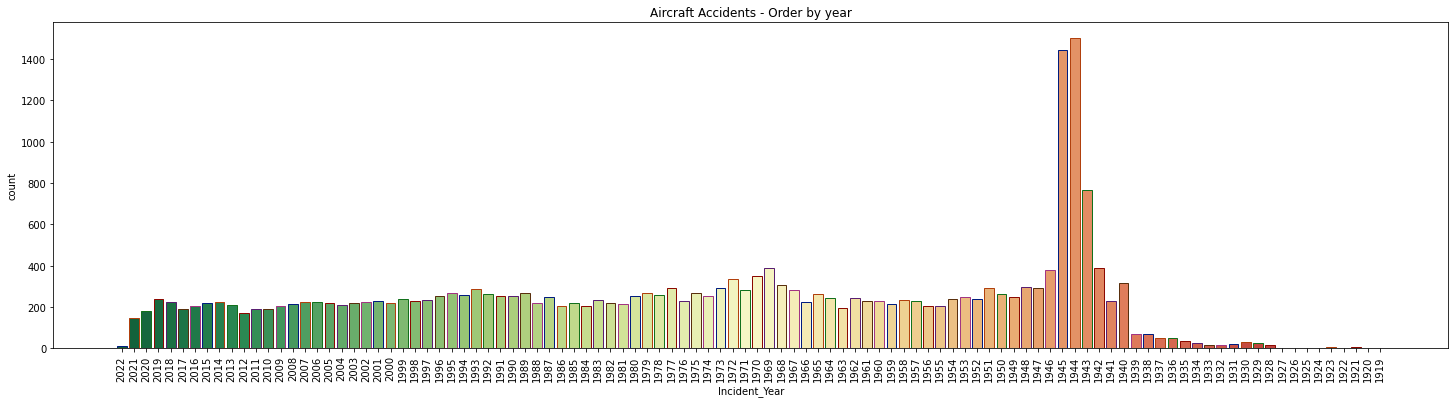

In [20]:
bar_plot_data(dropped_dataset, 'Incident_Year', 'Aircraft Accidents - Order by year', (25, 6), False)

**Insights**
This graph represents the number of incident took place each year. We can see the greater spike during 1940-1945. This is the same time at which world war 2 was at its peak and many military plans were destroyed or crashed.


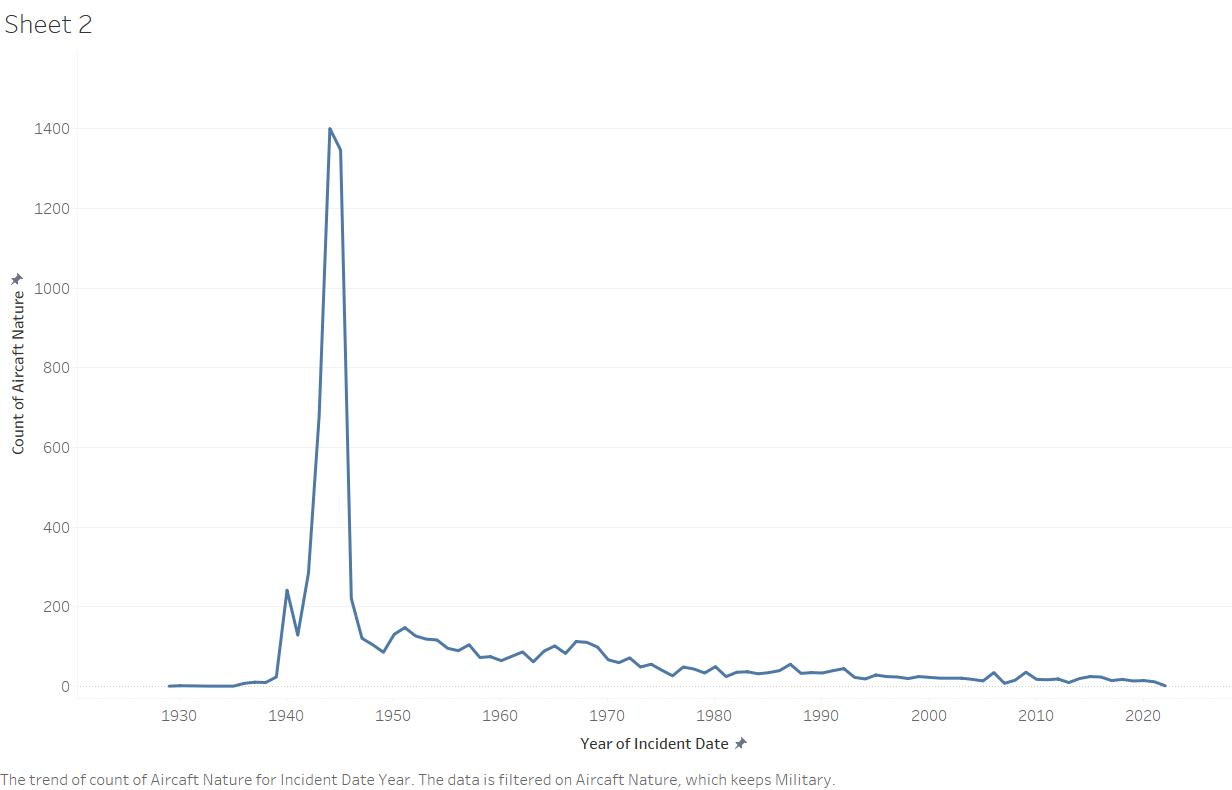

**Insight**
The assumption taken by us is true, during 1940 to 1945, military aircraft accidents were the highest due to world war-II that was taken place at that time.


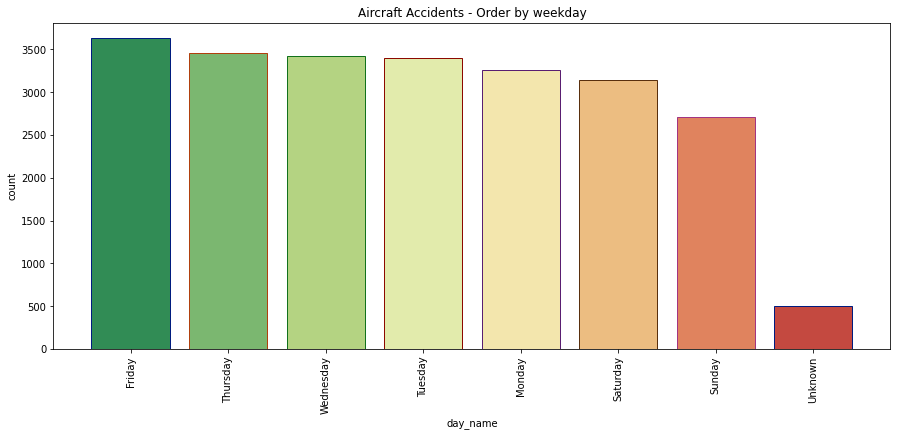

In [21]:
bar_plot_data(dropped_dataset, 'day_name', 'Aircraft Accidents - Order by weekday')

**Insight**
This graph represent the number of incidents by week days and as we can see on Friday there were highest incidents take place while on Sunday, the least incidents take place. We can also see that graph is quite same on Thursday, Wednesday, and Tuesday while little less on Monday followed by Saturday.


[]

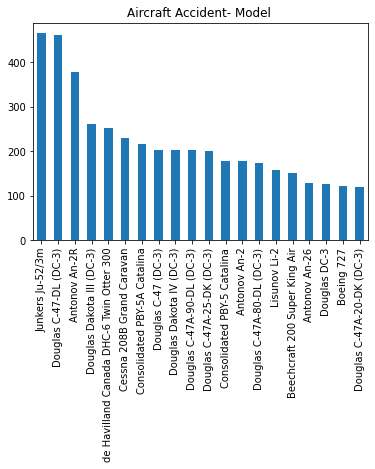

In [22]:
dropped_dataset['Aircaft_Model'].value_counts()[:20].plot(kind="bar")
plt.title("Aircraft Accident- Model ")
plt.xticks(rotation=90)
plt.plot(color="white", lw=2)

**Insight**
We can get to know that Junkers Ju-52/3m, followed by Douglas C-47-DL (DC-3)  gone through highest accidents while Douglas C-47A-20-DK (DC-3) Least so we can say that Douglas C-47A-20-DK (DC-3) we quite reliable than compared to any other aircraft model


[]

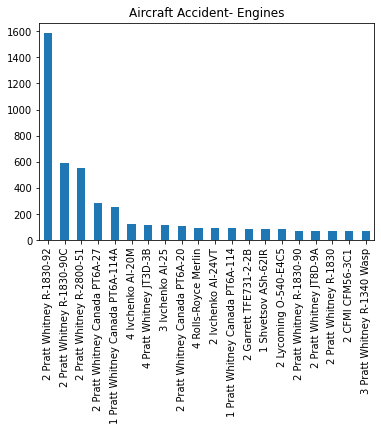

In [23]:
dropped_dataset['Aircaft_Engines'].value_counts()[:20].plot(kind="bar")
plt.xticks(rotation=90)
plt.title("Aircraft Accident- Engines")
plt.plot(color="white", lw=2)

**Insight**
2 Pratt Whitney R-1830-92  were the engines of aircraft that were gone under incident followed by earlier model of same engine 2 Pratt Whitney R-1830-90C. So, we can say that 2 Pratt Whitney Rs’ were least reliable as top 4 model were of same type.


[]

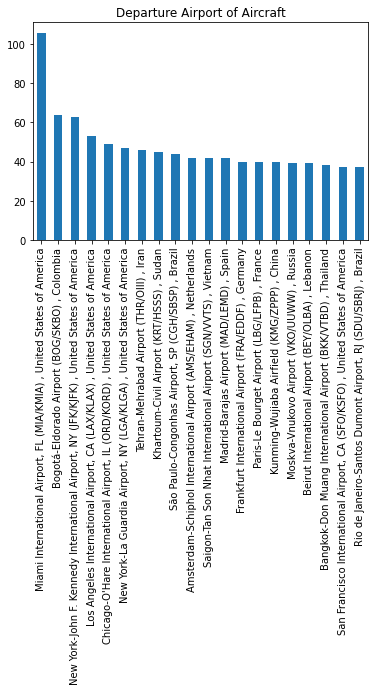

In [24]:
dropped_dataset[dropped_dataset.Departure_Airport != '?'][dropped_dataset.Departure_Airport != '-']['Departure_Airport'].value_counts()[:20].plot(kind="bar")
plt.xticks(rotation=90)
plt.title("Departure Airport of Aircraft")
plt.plot(color="white", lw=2)

[]

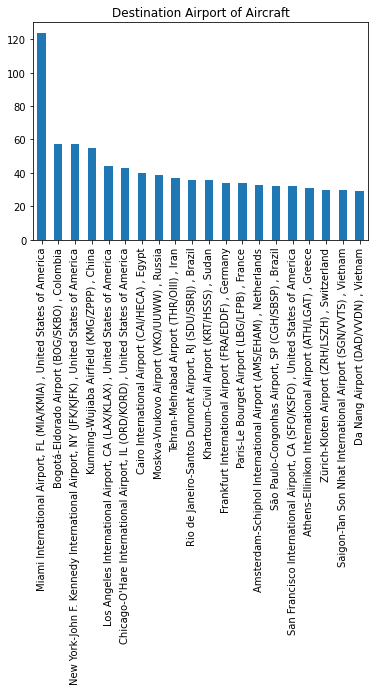

In [25]:
dropped_dataset[dropped_dataset.Destination_Airport != '?'][dropped_dataset.Destination_Airport != '-']['Destination_Airport'].value_counts()[:20].plot(kind="bar")
plt.xticks(rotation=90)
plt.title("Destination Airport of Aircraft")
plt.plot(color="white", lw=2)

**Insight**
Miami International Airport, FL (MIA/KMIA) , United States of America is the busiest 
airport with the greatest number of take-offs and landings. Bogotá-Eldorado Airport (BOG/SKBO) , Colombia  is the 2nd busiest airport while Rio de Janeiro-Santos Dumont Airport, RJ (SDU/SBRJ) , Brazil is least in terms of departure while Da Nang Airport (DAD/VVDN) , Vietnam is
least in terms of destination airport.


[]

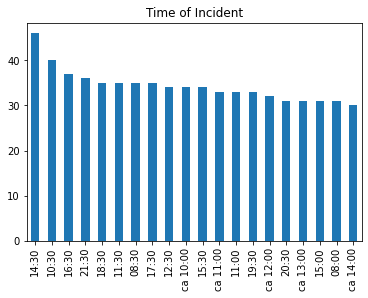

In [26]:
dropped_dataset['Time'].value_counts()[:20].plot(kind="bar")
plt.xticks(rotation=90)
plt.title("Time of Incident")
plt.plot(color="white", lw=2)

[]

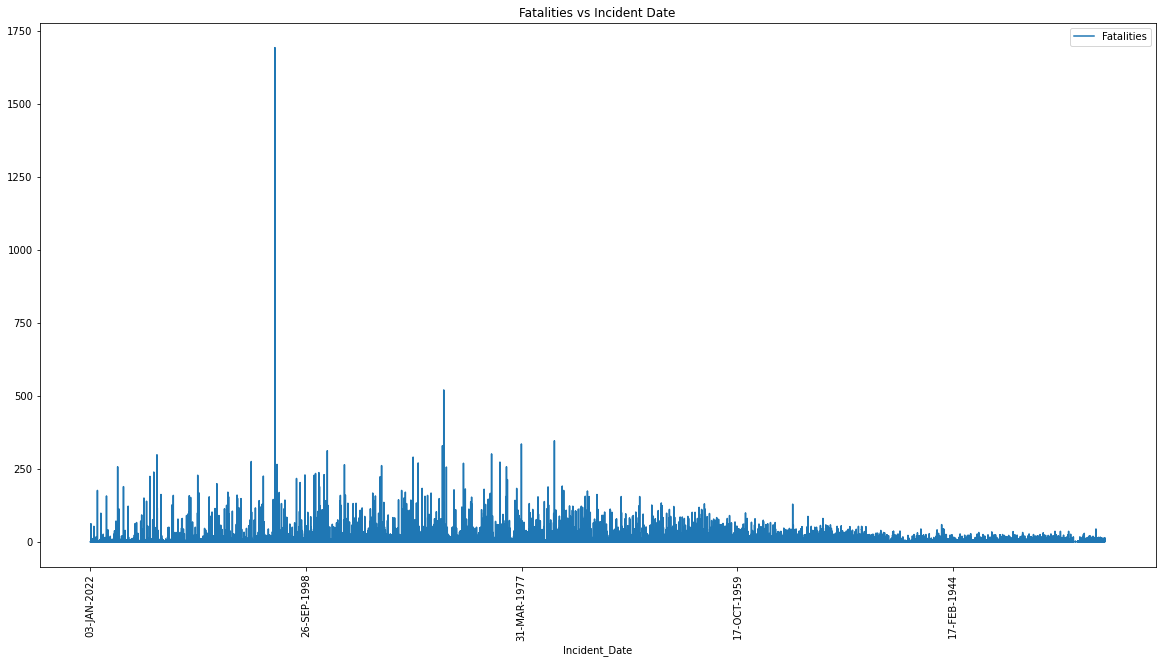

In [27]:
dropped_dataset.plot('Incident_Date','Fatalities',figsize=(20, 10))
plt.xticks(rotation=90)
plt.title("Fatalities vs Incident Date")
plt.plot(color="white", lw=2)

**Insight**
Staring from 1919 to 2022, this graph shows the number of fatalities caused by dates. We can see around 2001 there is a huge spike and one can remember 9/11 which caused a huge loss of lives in air and on earth. But as time passes and number of operational flights increases, number of fatalities also increases with time.


[]

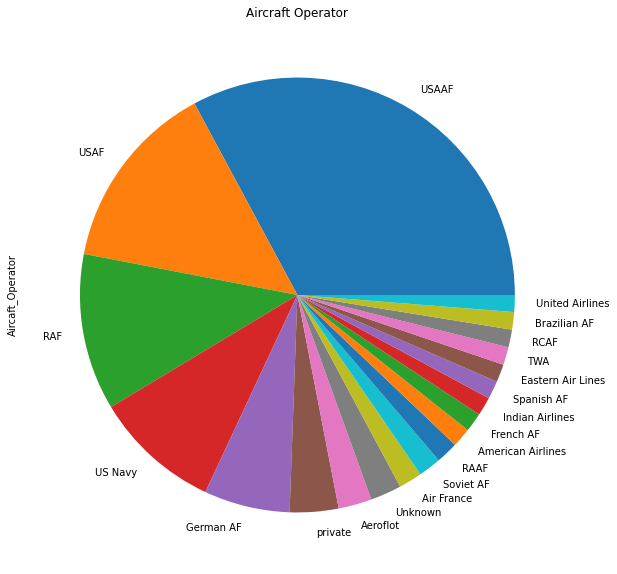

In [28]:
dropped_dataset['Aircaft_Operator'].value_counts()[:20].plot(kind="pie", figsize=(20, 10))
plt.title("Aircraft Operator")
plt.plot(color="white", lw=2)

**Insight**
United States Army Air Forces lost the most aircraft as it was quite understandable as us air 
force is quite active in various wars including world war2, Vietnam war, middle east and 
Afghanistan operations. Followed by United States Air Forces Then Royal Air Force. So, it is 
quite evident large number of planes which are destroyed are because of military operations 
and are operated by military.


[]

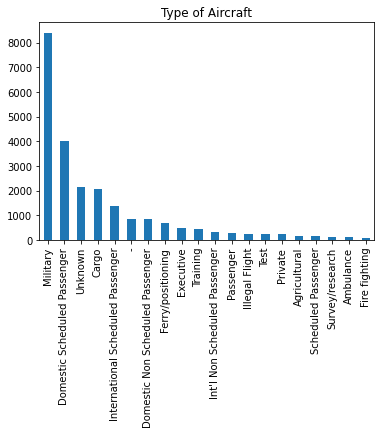

In [29]:
dropped_dataset['Aircaft_Nature'].value_counts()[:20].plot(kind="bar")
plt.xticks(rotation=90)
plt.title("Type of Aircraft")
plt.plot(color="white", lw=2)

**Insight**
We can confirm our above prediction using this graph and military is the one who lost most 
of the planes then followed by domestic airlines then followed by planes whose operators are unknown and not given in the dataset followed by cargo. The least crashed planes are fire 
fighting’s as these are emergency planes and used under emergency and certain specific 
conditions.


[]

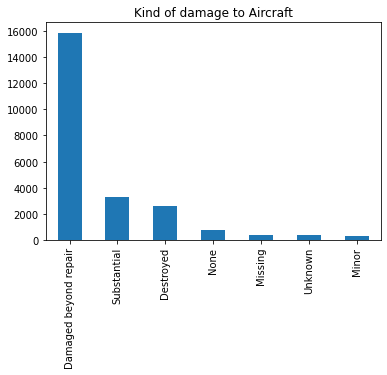

In [30]:
dropped_dataset['Aircaft_Damage_Type'].value_counts()[:20].plot(kind="bar")
plt.xticks(rotation=90)
plt.title("Kind of damage to Aircraft")
plt.plot(color="white", lw=2)

**Insight**
Most of the planes are damaged beyond repIR

In [31]:
dropped_dataset['Incident_Category'].unique()

array(['Accident | repairable-damage', 'Accident | hull-loss',
       'Criminal occurrence (sabotage, shoot down) | hull-loss',
       'other occurrence (ground fire, sabotage) | hull-loss',
       'Criminal occurrence (sabotage, shoot down) | repairable-damage',
       'Hijacking | repairable-damage',
       'other occurrence (ground fire, sabotage) | repairable-damage',
       'occurrence unknown | hull-loss', 'Incident | repairable-damage',
       'Hijacking | hull-loss'], dtype=object)

In [32]:
dropped_dataset[['Incident_Type', 'Incident_Damage_State']] = dropped_dataset['Incident_Category'].str.split("|", expand=True)

In [33]:
dropped_dataset['Incident_Cause(es)'].unique()

array(['Airplane - Engines, Airplane - Engines - Prop/turbine blade separation, Collision - Object, Collision - Object - Bird, Result - Emergency, forced landing - On runway',
       'Airplane - Undercarriage, Airplane - Undercarriage - Landing gear collapse, Result - Runway mishap',
       'Cargo - Fire/smoke, Result - Damaged on the ground', ...,
       'Fire - Inflight, Result - Loss of control, Unknown - Cause undetermined',
       'Airplane - Undercarriage, Airplane - Undercarriage - Gear-up landing, ATC & navigation - VFR flight in IMC, Result - Emergency, forced landing - Outside airport',
       'Airplane - Flight control surfaces, Airplane - Flight control surfaces - Rudder, Result - Emergency, forced landing - Outside airport'],
      dtype=object)

In [34]:
non_fatal_accidents = (dropped_dataset[dropped_dataset['Fatalities'] == 0])
non_fatal_accidents.head(5)

,Incident_Date,Aircaft_Model,Aircaft_Registration,Aircaft_Operator,Aircaft_Nature,Incident_Category,Incident_Cause(es),Incident_Location,Aircaft_Damage_Type,Date,...,Destination_Airport,day_name,fatalities_int,occupants_int,survived_int,Incident_Day,Incident_Month,Incident_Year,Incident_Type,Incident_Damage_State
0,03-JAN-2022,British Aerospace 4121 Jetstream 41,ZS-NRJ,SA Airlink,Domestic Non Scheduled Passenger,Accident | repairable-damage,"Airplane - Engines, Airplane - Engines - Prop/...",near Venetia Mine...,Substantial,Monday 3 January 2022,...,"Venetia Mine Airport (FAVM) , South Africa",Monday,0,7,7,03,JAN,2022,Accident,repairable-damage
1,04-JAN-2022,British Aerospace 3101 Jetstream 31,HR-AYY,LANHSA,Domestic Scheduled Passenger,Accident | repairable-damage,"Airplane - Undercarriage, Airplane - Undercarr...",Roatán-Juan ...,Substantial,Tuesday 4 January 2022,...,Roatán-Juan Manuel Gálvez International Airpor...,Tuesday,0,19,19,04,JAN,2022,Accident,repairable-damage
2,05-JAN-2022,Boeing 737-4H6,EP-CAP,Caspian Airlines,Domestic Scheduled Passenger,Accident | repairable-damage,"Airplane - Undercarriage, Airplane - Undercarr...",Isfahan-Shah...,Substantial,Wednesday 5 January 2022,...,"Isfahan-Shahid Beheshti Airport (IFN/OIFM) , Iran",Wednesday,0,116,116,05,JAN,2022,Accident,repairable-damage
3,08-JAN-2022,Tupolev Tu-204-100C,RA-64032,"Cainiao, opb Aviastar-TU",Cargo,Accident | hull-loss,"Cargo - Fire/smoke, Result - Damaged on the gr...",Hangzhou-Xia...,Destroyed,Saturday 8 January 2022,...,"Novosibirsk-Tolmachevo Airport (OVB/UNNT) , Ru...",Saturday,0,8,8,08,JAN,2022,Accident,hull-loss
4,12-JAN-2022,Beechcraft 200 Super King Air,NaN,private,Illegal Flight,"Criminal occurrence (sabotage, shoot down) | h...",Result - Damaged on the ground,"Machakilha, ...",Damaged beyond repair,Wednesday 12 January 2022,...,?,Wednesday,0,0,0,12,JAN,2022,"Criminal occurrence (sabotage, shoot down)",hull-loss


In [35]:
fatal_accidents = (dropped_dataset[dropped_dataset['Fatalities'] >0])
fatal_accidents.head(5)

,Incident_Date,Aircaft_Model,Aircaft_Registration,Aircaft_Operator,Aircaft_Nature,Incident_Category,Incident_Cause(es),Incident_Location,Aircaft_Damage_Type,Date,...,Destination_Airport,day_name,fatalities_int,occupants_int,survived_int,Incident_Day,Incident_Month,Incident_Year,Incident_Type,Incident_Damage_State
9,11-FEB-2022,Antonov An-2R,RA-33599,Kamchatsky Krechet,Cargo,Accident | hull-loss,Info-Unavailable,"near Koryaki, Yel...",Destroyed,Friday 11 February 2022,...,?,Friday,2,2,0,11,FEB,2022,Accident,hull-loss
14,09-JAN-2021,Boeing 737-524 (WL),PK-CLC,Sriwijaya Air,Domestic Scheduled Passenger,Accident | hull-loss,Result - Loss of control,near Jakarta-Soek...,Destroyed,Saturday 9 January 2021,...,"Pontianak Airport (PNK/WIOO) , Indonesia",Saturday,62,62,0,09,JAN,2021,Accident,hull-loss
15,09-JAN-2021,Cessna 560 Citation V,N3RB,SX Transport LLC,Unknown,Accident | hull-loss,"Result - Loss of control, Result - Loss of con...","near Pine Grove, OR",Destroyed,Saturday 9 January 2021,...,"Boise Air Terminal, ID (BOI/KBOI) , United Sta...",Saturday,1,1,0,09,JAN,2021,Accident,hull-loss
16,12-JAN-2021,Harbin Y-12-II,NaN,Kenyan AF,Military,Accident | hull-loss,Info-Unavailable,near Voi,Damaged beyond repair,Tuesday 12 January 2021,...,"Mombasa-Moi International Airport (MBA/HKMO) ,...",Tuesday,4,4,0,12,JAN,2021,Accident,hull-loss
25,??-JAN-2021,Antonov An-2,NaN,KPAAF,Military,Accident | hull-loss,Result - Loss of control,near Taechon Air ...,Damaged beyond repair,xx JAN 2021,...,"Taechon Air Base , North Korea",Unknown,5,5,0,??,JAN,2021,Accident,hull-loss


In [36]:
fatal_accidents.Incident_Type.unique()

array(['Accident ', 'Criminal occurrence (sabotage, shoot down) ',
       'Hijacking ', 'other occurrence (ground fire, sabotage) ',
       'occurrence unknown '], dtype=object)

In [37]:
fatal_incident_types = ['Accident ', 'Criminal occurrence (sabotage, shoot down) ',
 'other occurrence (ground fire, sabotage) ', 'Hijacking ',
 'occurrence unknown ', 'Incident ']

In [38]:
arg_accident = fatal_accidents['Incident_Type'] == 'Accident '
arg_criminal = fatal_accidents['Incident_Type'] == 'Criminal occurrence (sabotage, shoot down) '
arg_hijack = fatal_accidents['Incident_Type'] == 'Hijacking '
arg_other_ground = fatal_accidents['Incident_Type'] == 'other occurrence (ground fire, sabotage) '
arg_unknown = fatal_accidents['Incident_Type'] == 'occurrence unknown '

fatal_accident = fatal_accidents[arg_accident]
fatal_criminal = fatal_accidents[arg_criminal]
fatal_hijack = fatal_accidents[arg_hijack]
fatal_other_ground = fatal_accidents[arg_other_ground]
fatal_unknown = fatal_accidents[arg_unknown]

fatal_accident_count = len(fatal_accident)
fatal_criminal_count = len(fatal_criminal)
fatal_hijack_count = len(fatal_hijack)
fatal_other_ground_count = len(fatal_other_ground)
fatal_unknown_count = len(fatal_unknown)

fatal_accident_count 

8508

In [39]:
fatal_incident_counts = []
fatal_incident_counts.append(fatal_accident_count)
fatal_incident_counts.append(fatal_criminal_count)
fatal_incident_counts.append(fatal_hijack_count)
fatal_incident_counts.append(fatal_other_ground_count)
fatal_incident_counts.append(fatal_unknown_count)
fatal_incident_counts.append(0)

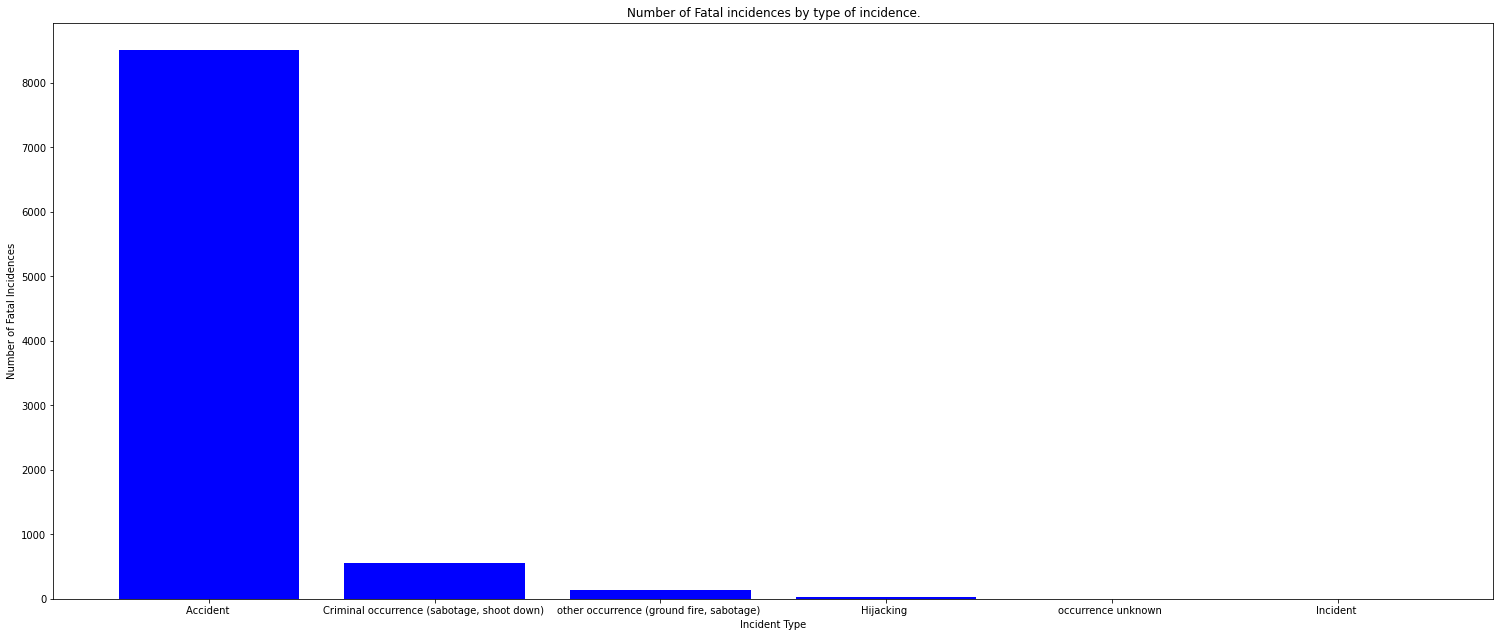

In [40]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_axes([0,0,1,1])
incidence_types_plot = fatal_incident_types
incidence_count_plot = fatal_incident_counts
ax.set_xlabel('Incident Type')
ax.set_ylabel('Number of Fatal Incidences')
ax.set_title('Number of Fatal incidences by type of incidence.')
ax.bar(incidence_types_plot,incidence_count_plot, color='b')
plt.show()

**Insight**
The accident is the main reason behind the most life losses and the count is quite high as 
compared to next reason. Criminal activities are second activity as these are took place to result in loss of lives of passengers. Incidents are the least as is compared to zero so incident are not that fatal as compared to accidents which is the main reason of fatalities.


In [41]:
non_fatal_accidents.Incident_Type.unique()

array(['Accident ', 'Criminal occurrence (sabotage, shoot down) ',
       'other occurrence (ground fire, sabotage) ', 'Hijacking ',
       'occurrence unknown ', 'Incident '], dtype=object)

['Accident ' 'Criminal occurrence (sabotage, shoot down) '
 'other occurrence (ground fire, sabotage) ' 'Hijacking '
 'occurrence unknown ' 'Incident ']


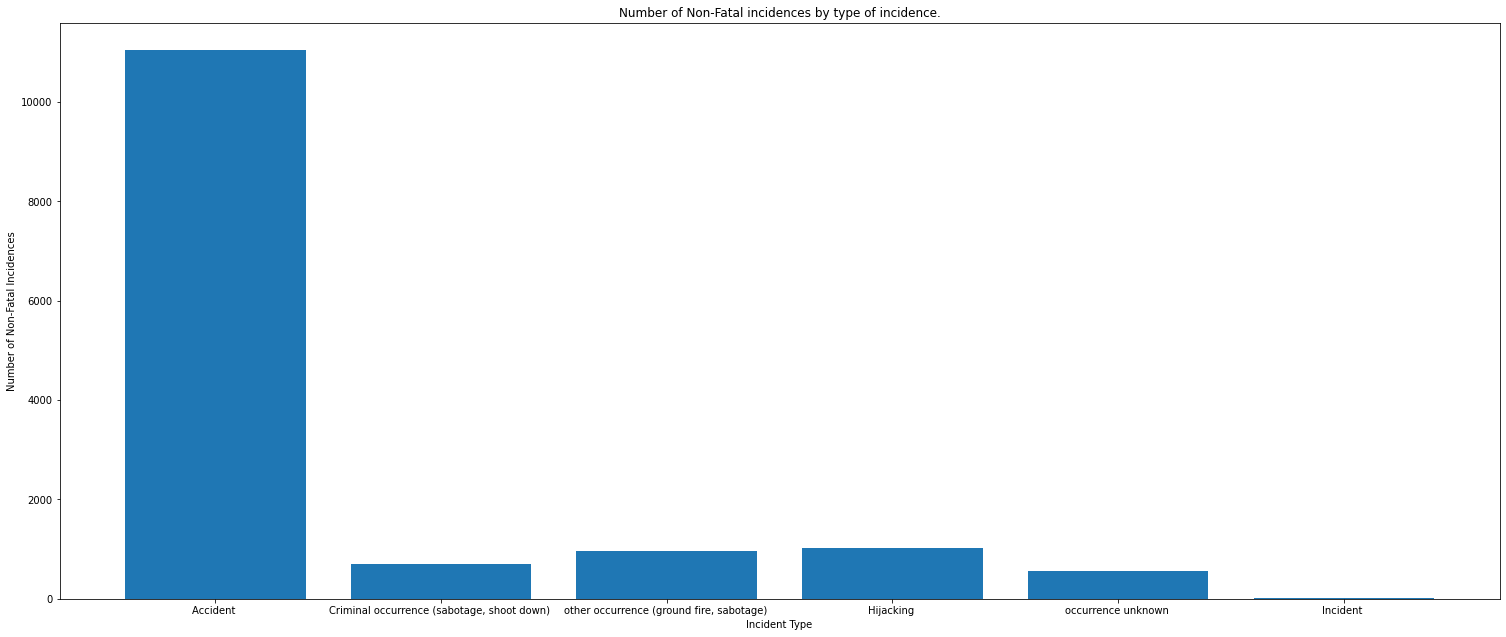

In [42]:
non_fatal_incident_types = non_fatal_accidents['Incident_Type'].unique()

print(non_fatal_incident_types)
arg_accident_nf = non_fatal_accidents['Incident_Type'] == 'Accident '
arg_criminal_nf = non_fatal_accidents['Incident_Type'] == 'Criminal occurrence (sabotage, shoot down) '
arg_hijack_nf = non_fatal_accidents['Incident_Type'] == 'Hijacking '
arg_other_ground_nf = non_fatal_accidents['Incident_Type'] == 'other occurrence (ground fire, sabotage) '
arg_unknown_nf = non_fatal_accidents['Incident_Type'] == 'occurrence unknown '
arg_incident_nf = non_fatal_accidents['Incident_Type'] == 'Incident '

non_fatal_accident = non_fatal_accidents[arg_accident_nf]
non_fatal_criminal = non_fatal_accidents[arg_criminal_nf]
non_fatal_hijack = non_fatal_accidents[arg_hijack_nf]
non_fatal_other_ground = non_fatal_accidents[arg_other_ground_nf]
non_fatal_unknown = non_fatal_accidents[arg_unknown_nf]
non_fatal_incident = non_fatal_accidents[arg_incident_nf]

non_fatal_accident_count = len(non_fatal_accident)
non_fatal_criminal_count = len(non_fatal_criminal)
non_fatal_hijack_count = len(non_fatal_hijack)
non_fatal_other_ground_count = len(non_fatal_other_ground)
non_fatal_unknown_count = len(non_fatal_unknown)
non_fatal_incident_count = len(non_fatal_incident)

non_fatal_incident_counts = []
non_fatal_incident_counts.append(non_fatal_accident_count)
non_fatal_incident_counts.append(non_fatal_criminal_count)
non_fatal_incident_counts.append(non_fatal_hijack_count)
non_fatal_incident_counts.append(non_fatal_other_ground_count)
non_fatal_incident_counts.append(non_fatal_unknown_count)
non_fatal_incident_counts.append(non_fatal_incident_count)

fig = plt.figure(figsize=(20,8))
ax = fig.add_axes([0,0,1,1])
nf_incidence_types_plot = non_fatal_incident_types
nf_incidence_count_plot = non_fatal_incident_counts
ax.set_xlabel('Incident Type')
ax.set_ylabel('Number of Non-Fatal Incidences')
ax.set_title('Number of Non-Fatal incidences by type of incidence.')
ax.bar(non_fatal_incident_types,nf_incidence_count_plot)
plt.show()

**Insight**
Data is quite same for non-fatal incidents with accident with highest followed by criminal activities and incident remain the same the least once.


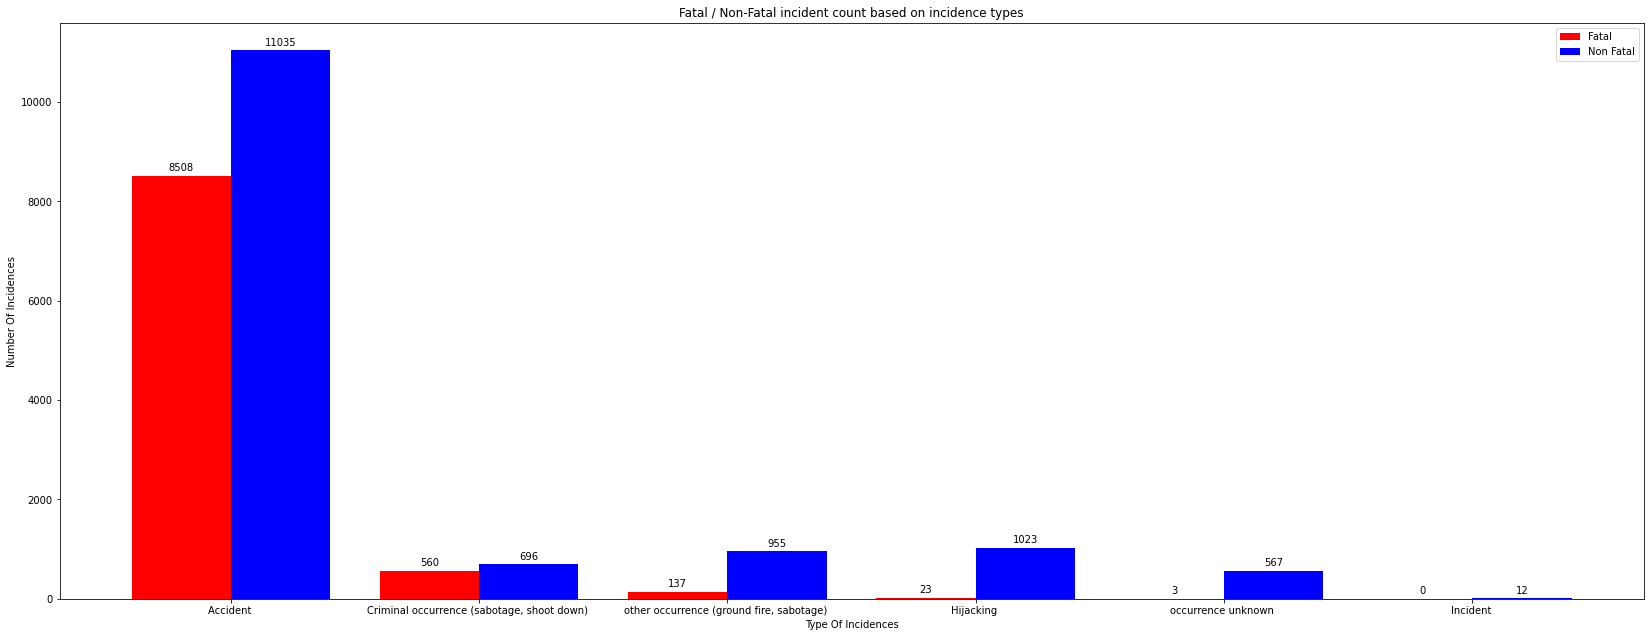

In [43]:
labels = non_fatal_incident_types
width = 0.4

x = np.arange(len(non_fatal_incident_types))
fig = plt.figure(figsize=(22,8))
ax = fig.add_axes([0,0,1,1])

ax.set_ylabel('Number Of Incidences')
ax.set_xlabel('Type Of Incidences')
ax.set_title('Fatal / Non-Fatal incident count based on incidence types')
ax.set_xticks(x, labels)

rect_fatal = ax.bar(x - width/2, fatal_incident_counts, .4, label="Fatal", color='r')
rect_non_fatal = ax.bar(x + width/2, non_fatal_incident_counts, .4, label="Non Fatal", color='b')

ax.bar_label(rect_fatal, padding=3)
ax.bar_label(rect_non_fatal, padding=3)
ax.legend()

plt.show()

**Insight**
This graph made the above situation quite clearer as it compared the above two graph in 
one.


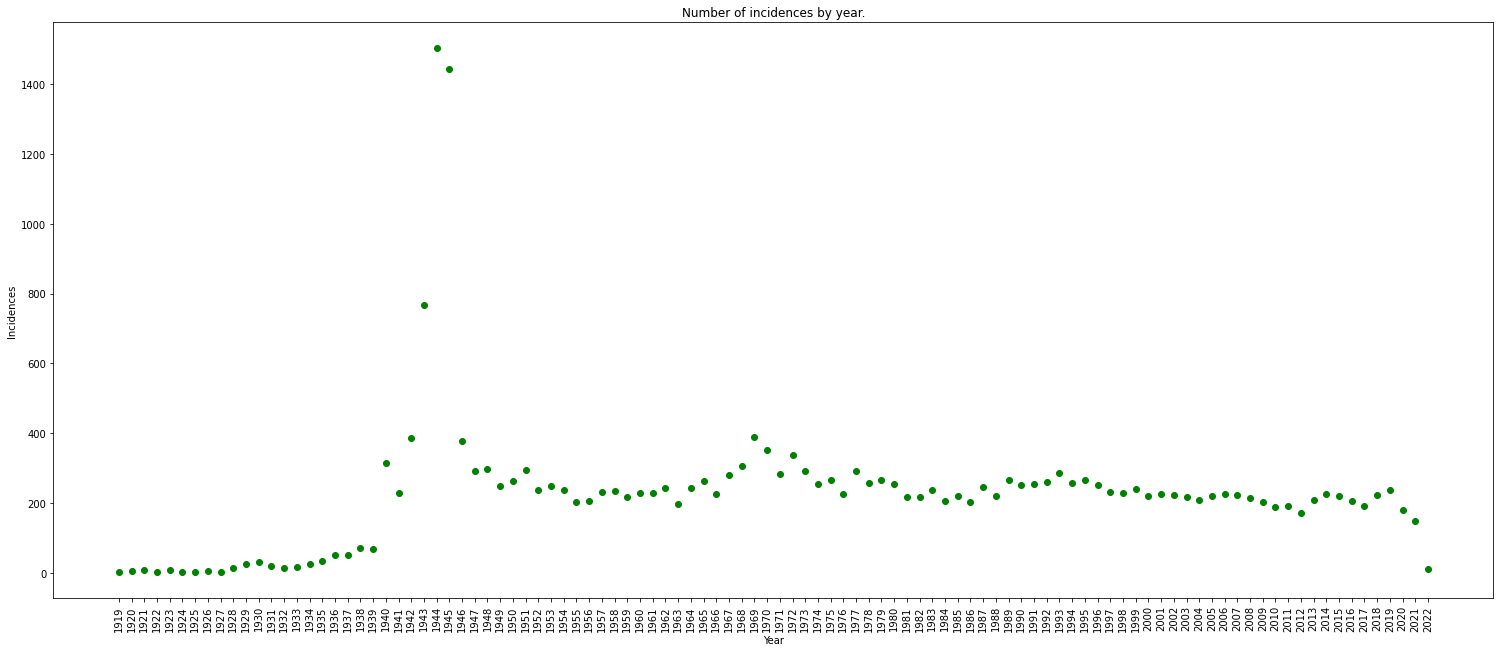

In [44]:
unique_incident_year = dropped_dataset['Incident_Year'].unique()


unique_incident_year=unique_incident_year[::-1]
unique_incident_year
most_impacted_year = 0
instances_in_current_year = 0
total_instances_by_year = []


for year in unique_incident_year:
    fatal_year_arg = fatal_accidents['Incident_Year'] == year
    non_fatal_year_arg = non_fatal_accidents['Incident_Year'] == year
    
    fatal_year_incidences = fatal_accidents[fatal_year_arg]
    non_fatal_year_incidences = non_fatal_accidents[non_fatal_year_arg]
    
    total_incidences = len(fatal_year_incidences) + len(non_fatal_year_incidences)
    
    total_instances_by_year.append(total_incidences)

    
fig=plt.figure(figsize=(20,8))
ax=fig.add_axes([0,0,1,1])
ax.scatter(unique_incident_year, total_instances_by_year, color='g')
ax.set_xlabel('Year')
plt.xticks(rotation=90)
ax.set_ylabel('Incidences')
ax.set_title('Number of incidences by year.')
plt.show()

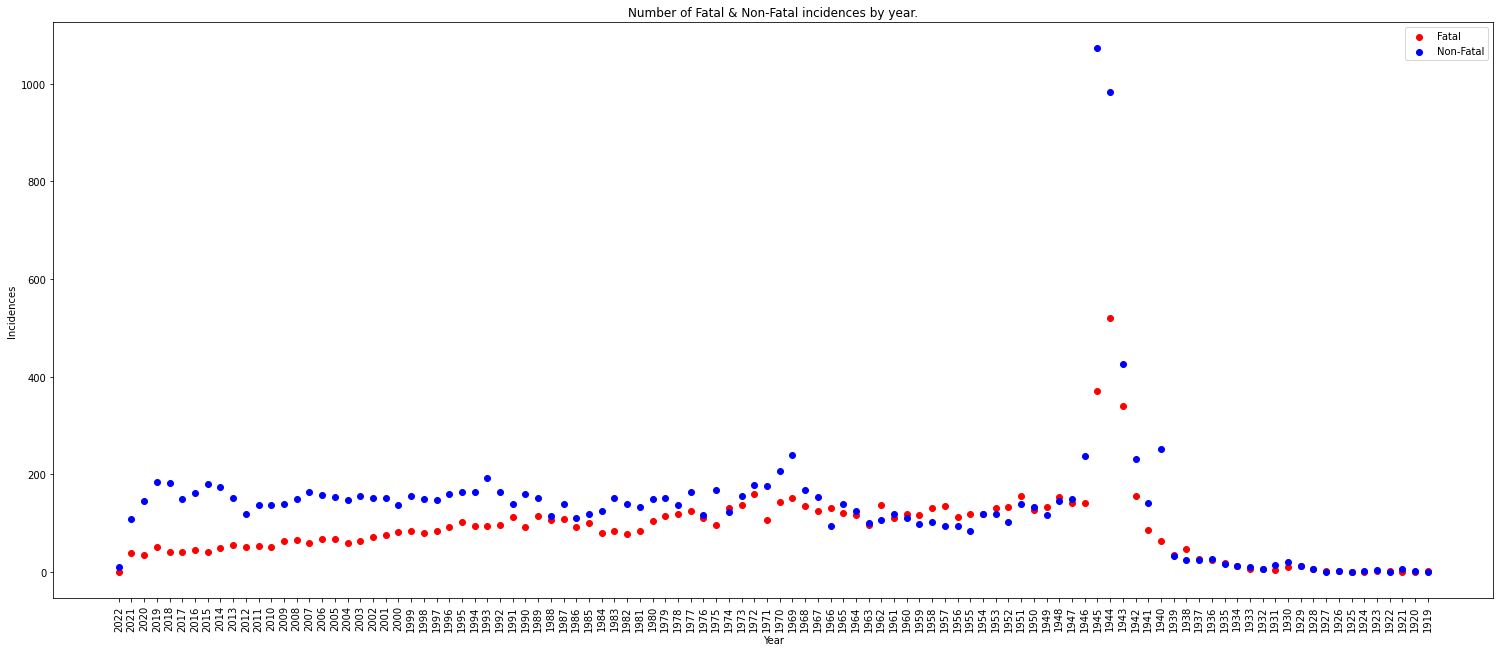

In [45]:
unique_incident_year = dropped_dataset['Incident_Year'].unique()
most_impacted_year = 0
instances_in_current_year = 0
fatal_incidences_by_year = []
non_fatal_incidences_by_year = []

for year in unique_incident_year:
    fatal_year_arg = fatal_accidents['Incident_Year']==year
    non_fatal_year_arg = non_fatal_accidents['Incident_Year'] == year
    
    
    fatal_year_incidences = fatal_accidents[fatal_year_arg]
    non_fatal_year_incidences = non_fatal_accidents[non_fatal_year_arg]
    
    total_incidences = len(fatal_year_incidences) + len(non_fatal_year_incidences)
    
    if total_incidences > int(instances_in_current_year):
        instances_in_current_year = total_incidences
        most_impacted_year = year
    fatal_incidences_by_year.append(len(fatal_year_incidences))
    non_fatal_incidences_by_year.append(len(non_fatal_year_incidences))
    
fig=plt.figure(figsize=(20,8))
ax=fig.add_axes([0,0,1,1])
ax.scatter(unique_incident_year, fatal_incidences_by_year, color='r', label="Fatal")
ax.scatter(unique_incident_year, non_fatal_incidences_by_year, color='b', label="Non-Fatal")
ax.set_xlabel('Year')
ax.set_ylabel('Incidences')
plt.xticks(rotation=90)
ax.set_title('Number of Fatal & Non-Fatal incidences by year.')
ax.legend()
plt.show()
   

**Insight**
This graph further extend our comparison and we can see that fatal incidents are low as 
compared to non-fatal incident which is quite good news and by years passing fatal incidents 
count is lowering and diminishing as advancing in technology aims to reduce these fatal 
incident rates.


['Domestic Non Scheduled Passenger' 'Domestic Scheduled Passenger' 'Cargo'
 'Illegal Flight' 'Military' 'Unknown' 'Passenger' 'Ambulance' 'Test'
 'Training' '-' 'Agricultural' 'Ferry/positioning' 'Private' 'Executive'
 'Parachuting' 'Fire fighting' 'Aerial Work (Calibration, Photo)'
 'International Scheduled Passenger' 'Survey/research'
 "Int'l Non Scheduled Passenger" 'Official state flight' 'Demonstration'
 'Non Scheduled Passenger' 'Scheduled Passenger']


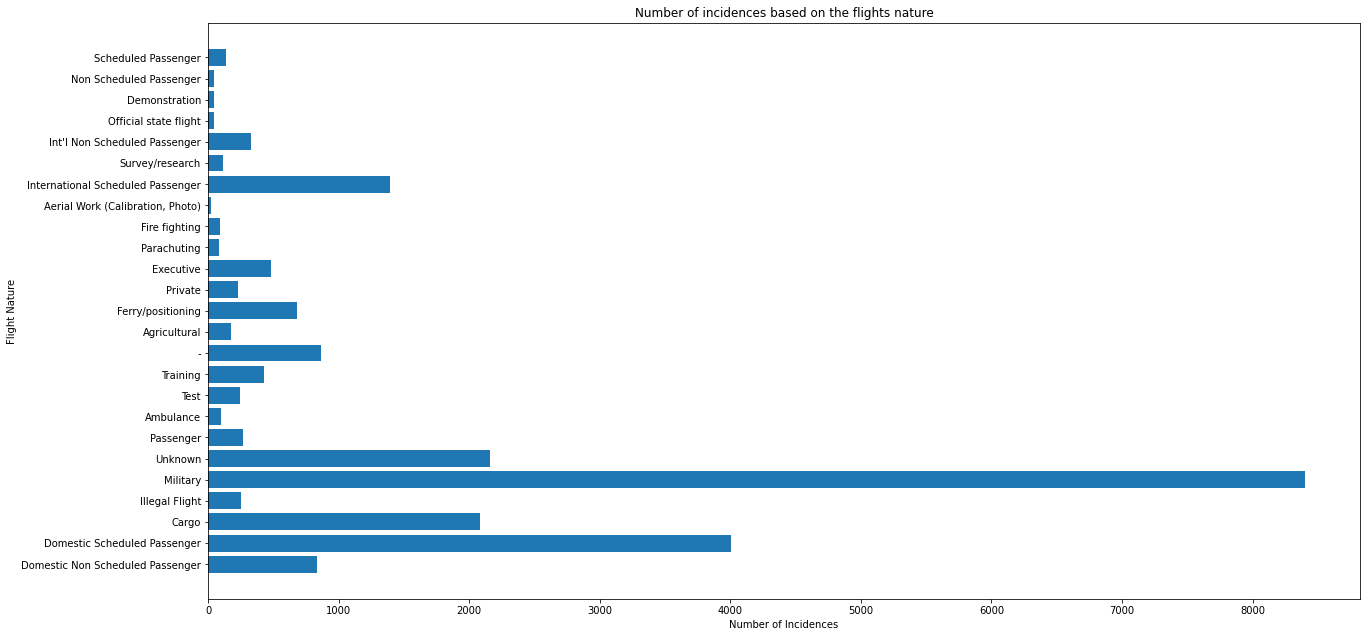

In [46]:
unique_flight_nature = dropped_dataset['Aircaft_Nature'].unique()
print(unique_flight_nature)
unique_incident_counter = []
for flight_nature in unique_flight_nature:
    flight_nature_arg = dropped_dataset['Aircaft_Nature'] == flight_nature
    flight_nature_dataset = dropped_dataset[flight_nature_arg]
    flight_nature_count = len(flight_nature_dataset)
    unique_incident_counter.append(flight_nature_count)
#     print('There were ' + str(flight_nature_count) + ' incidences that fell under the following nature: ' + str(flight_nature))

fig=plt.figure(figsize=(16,8))
ax=fig.add_axes([0,0,1,1])
plt.barh(unique_flight_nature, unique_incident_counter)
plt.title('Number of incidences based on the flights nature')
plt.ylabel('Flight Nature')
plt.xlabel('Number of Incidences')
plt.show()

In [47]:
dropped_dataset[dropped_dataset['Aircaft_Nature']   == 'Military']

,Incident_Date,Aircaft_Model,Aircaft_Registration,Aircaft_Operator,Aircaft_Nature,Incident_Category,Incident_Cause(es),Incident_Location,Aircaft_Damage_Type,Date,...,Destination_Airport,day_name,fatalities_int,occupants_int,survived_int,Incident_Day,Incident_Month,Incident_Year,Incident_Type,Incident_Damage_State
6,31-JAN-2022,Beechcraft B300 King Air 350,C-GEAS,"Air Tindi, opf RCAF",Military,Accident | repairable-damage,Result - Runway excursion,Thunder Bay ...,Substantial,Monday 31 January 2022,...,"Thunder Bay Airport, ON (YQT/CYQT) , Canada",Monday,0,3,3,31,JAN,2022,Accident,repairable-damage
8,08-FEB-2022,Antonov An-26,SP-402,South Sudanese Air Force,Military,Accident | repairable-damage,Info-Unavailable,Agok Airstrip,Substantial,Tuesday 8 February 2022,...,"Agok Airstrip , South Sudan",Tuesday,0,12,12,08,FEB,2022,Accident,repairable-damage
16,12-JAN-2021,Harbin Y-12-II,NaN,Kenyan AF,Military,Accident | hull-loss,Info-Unavailable,near Voi,Damaged beyond repair,Tuesday 12 January 2021,...,"Mombasa-Moi International Airport (MBA/HKMO) ,...",Tuesday,4,4,0,12,JAN,2021,Accident,hull-loss
22,26-JAN-2021,Harbin Yunshuji Y-12E,AF-222,Zambian Air Force,Military,Accident | repairable-damage,Result - Runway excursion,Mukinge Miss...,Substantial,Tuesday 26 January 2021,...,"Mukinge Mission Airstrip (FLGE) , Zambia",Tuesday,0,5,5,26,JAN,2021,Accident,repairable-damage
25,??-JAN-2021,Antonov An-2,NaN,KPAAF,Military,Accident | hull-loss,Result - Loss of control,near Taechon Air ...,Damaged beyond repair,xx JAN 2021,...,"Taechon Air Base , North Korea",Unknown,5,5,0,??,JAN,2021,Accident,hull-loss
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23368,22-MAR-1933,Ford JR-3 (5-AT-C) Tri-Motor,A8599,USMC,Military,Accident | hull-loss,Info-Unavailable,Virginia Bea...,Damaged beyond repair,Wednesday 22 March 1933,...,?,Wednesday,0,14,14,22,MAR,1933,Accident,hull-loss
23415,07-FEB-1930,Junkers R-42 (G.24),J6,Chilean AF,Military,Accident | hull-loss,"Result - Emergency, forced landing - Ditching",near Punta Arenas,Damaged beyond repair,Friday 7 February 1930,...,Punta Arenas-Carlos Ibañez Airport (PUQ/SCCI) ...,Friday,3,6,3,07,FEB,1930,Accident,hull-loss
23433,04-AUG-1930,Ford JR-3 (5-AT-C) Tri-Motor,A8598,USMC,Military,Accident | hull-loss,Info-Unavailable,"Ocotal, Nuev...",Damaged beyond repair,Monday 4 August 1930,...,?,Monday,0,1,1,04,AUG,1930,Accident,hull-loss
23444,??-???-1930,Junkers JuG-1W (G.24),NaN,Soviet AF,Military,Accident | hull-loss,Info-Unavailable,NaN,Damaged beyond repair,xx xxx 1930,...,?,Unknown,0,0,0,??,???,1930,Accident,hull-loss


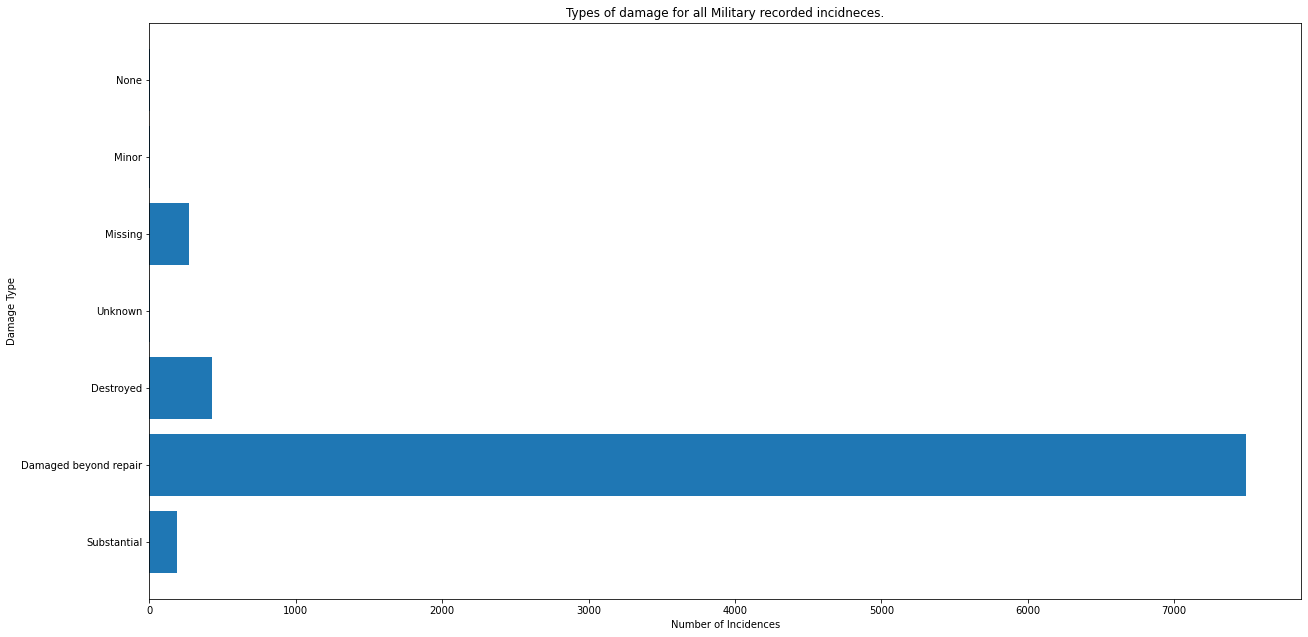

In [48]:
military_flight_arg = dropped_dataset['Aircaft_Nature'] == 'Military'
military_flight_dataset = dropped_dataset[military_flight_arg]
military_incidence_count = len(military_flight_dataset)
military_flight_type = military_flight_dataset['Aircaft_Damage_Type'].unique()
military_flight_type_couts = []

for incident_type in military_flight_type:
    military_type_arg = military_flight_dataset['Aircaft_Damage_Type'] == incident_type
    military_type_dataset = military_flight_dataset[military_type_arg]
    military_flight_type_couts.append(len(military_type_dataset))

fig=plt.figure(figsize=(16,8))
ax=fig.add_axes([0,0,1,1])
plt.barh(military_flight_type , military_flight_type_couts)
plt.title('Types of damage for all Military recorded incidneces.')
plt.ylabel('Damage Type')
plt.xlabel('Number of Incidences')
plt.show()

**Insight**
This graphs shows what kind of damage type military planes gone under and as we see most 
planes are damaged beyond repair and destroyed and quite a good number of planes are 
reported missing.


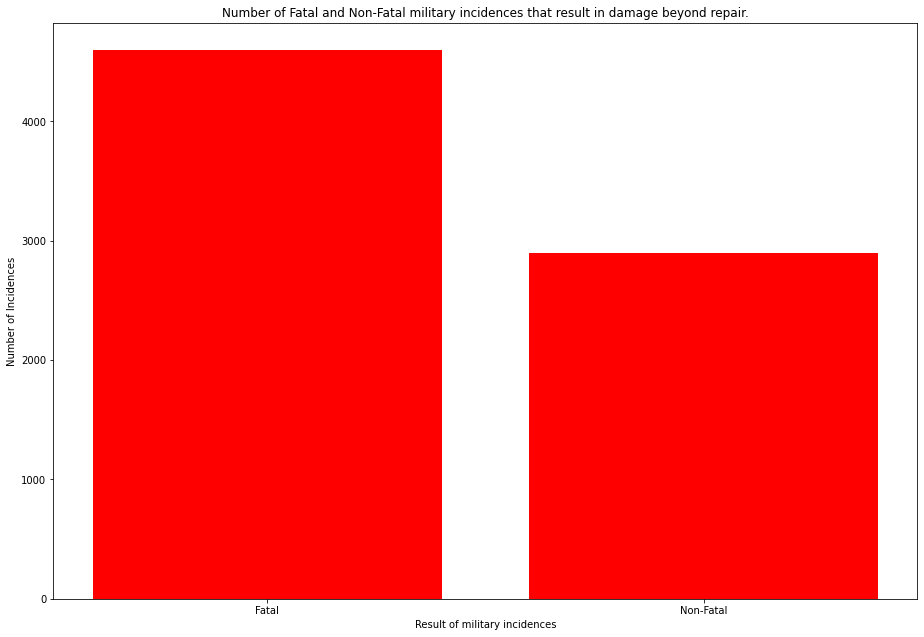

In [49]:
damaged_beyond_repair_military_incidences_arg = military_flight_dataset['Aircaft_Damage_Type'] == 'Damaged beyond repair'
damaged_beyond_repair_military_incidences = military_flight_dataset[damaged_beyond_repair_military_incidences_arg]

fatal_military_incidencs_results_in_dbr_arg = damaged_beyond_repair_military_incidences['Fatalities'] == 0
non_fatal_military_incidencs_results_in_dbr_arg = damaged_beyond_repair_military_incidences['Fatalities'] > 0

fatal_military_incidencs_results_in_dbr = damaged_beyond_repair_military_incidences[fatal_military_incidencs_results_in_dbr_arg]
non_fatal_military_incidencs_results_in_dbr = damaged_beyond_repair_military_incidences[non_fatal_military_incidencs_results_in_dbr_arg]

incidence_types_f_nf = ['Fatal', 'Non-Fatal']
incidence_tyles_f_nf_count = [len(fatal_military_incidencs_results_in_dbr), len(non_fatal_military_incidencs_results_in_dbr)]

fig = plt.figure(figsize=(12,8))
ax = fig.add_axes([0,0,1,1])
incidence_types_f_nf_plot = incidence_types_f_nf
incidence_count_f_nf_plot = incidence_tyles_f_nf_count
ax.set_xlabel('Result of military incidences')
ax.set_ylabel('Number of Incidences')
ax.set_title('Number of Fatal and Non-Fatal military incidences that result in damage beyond repair.')
ax.bar(incidence_types_f_nf_plot,incidence_count_f_nf_plot, color='r')
plt.show()

**Insight**
If we talk about incidents in which military planes are damaged beyond repair, crew on these planes have lost their lives as these planes are destroyed by enemies and this is illustrated 
clearly in above graph.


In [50]:
fatal_military_incidencs_results_in_dbr = damaged_beyond_repair_military_incidences[fatal_military_incidencs_results_in_dbr_arg]
non_fatal_military_incidencs_results_in_dbr = damaged_beyond_repair_military_incidences[non_fatal_military_incidencs_results_in_dbr_arg]
f_military_dbr_phase_unique = fatal_military_incidencs_results_in_dbr['Aircraft_Phase'].unique()
nf_military_dbr_phase_unique = non_fatal_military_incidencs_results_in_dbr['Aircraft_Phase'].unique()

f_military_phase_count = []

for phase in f_military_dbr_phase_unique:
    f_military_dbr_arg = fatal_military_incidencs_results_in_dbr['Aircraft_Phase'] == phase
    f_military_dbr = fatal_military_incidencs_results_in_dbr[f_military_dbr_arg]
    f_military_dbr_length = len(f_military_dbr)
    f_military_phase_count.append(f_military_dbr_length)
    
nf_military_phase_count = []

for phase in nf_military_dbr_phase_unique:
    nf_military_dbr_arg = non_fatal_military_incidencs_results_in_dbr['Aircraft_Phase'] == phase
    nf_military_dbr = non_fatal_military_incidencs_results_in_dbr[nf_military_dbr_arg]
    nf_military_dbr_length = len(nf_military_dbr)
    nf_military_phase_count.append(nf_military_dbr_length)

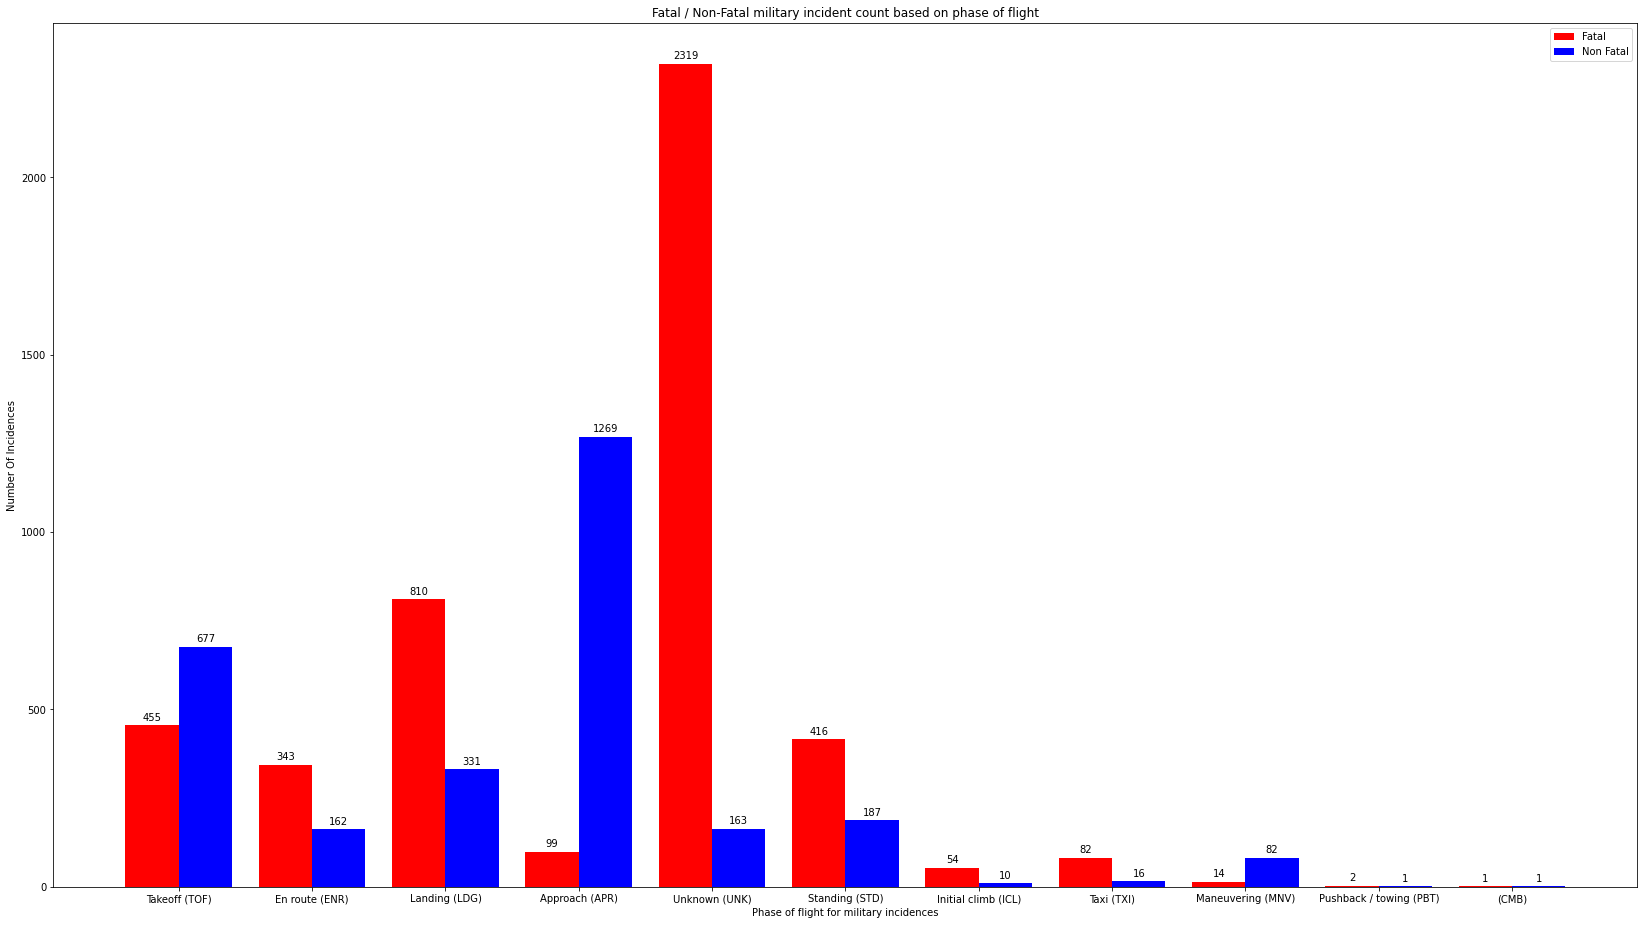

In [51]:
labels = f_military_dbr_phase_unique
width = 0.4

x = np.arange(len(f_military_dbr_phase_unique))
fig = plt.figure(figsize=(22,12))
ax = fig.add_axes([0,0,1,1])

ax.set_ylabel('Number Of Incidences')
ax.set_xlabel('Phase of flight for military incidences')
ax.set_title('Fatal / Non-Fatal military incident count based on phase of flight')
ax.set_xticks(x, labels)

rect_fatal = ax.bar(x - width/2, f_military_phase_count, .4, label="Fatal", color='r')
rect_non_fatal = ax.bar(x + width/2, nf_military_phase_count, .4, label="Non Fatal", color='b')

ax.bar_label(rect_fatal, padding=3)
ax.bar_label(rect_non_fatal, padding=3)
ax.legend()

plt.show()

**Insight**
If we talk about the phase of military incidents which result in fatal and non-fatal count, we 
can see the highest count is unknown and is not reported. The reason of this that military 
operations are quite secretive, and military never reveal where there aircraft were destroyed or damaged and lost the lives of its soldiers.


In [52]:
total_survived = {}
for d_year, d_survived in zip(dropped_dataset['Incident_Year'], dropped_dataset['survived_int']):
    if d_year not in total_survived:
        total_survived[d_year] = 0
    total_survived[d_year] += d_survived
    
df_total_survived = {'Incident_Year': [], 'count': []}
for i, j in total_survived.items():
    df_total_survived['Incident_Year'].append(i)
    df_total_survived['count'].append(j)

In [53]:
total_fatalities = {}
for d_year, d_fatalities in zip(dropped_dataset['Incident_Year'], dropped_dataset['Fatalities']):
    if d_year not in total_fatalities:
        total_fatalities[d_year] = 0
    total_fatalities[d_year] += d_fatalities
    
df_total_fatalities = {'Incident_Year': [], 'count': []}
for i, j in total_fatalities.items():
    df_total_fatalities['Incident_Year'].append(i)
    df_total_fatalities['count'].append(j)
    
cm = sns.light_palette("red", as_cmap=True)
df_total_fatalities = pd.DataFrame(df_total_fatalities)
df_total_fatalities.head(10).style.background_gradient(cmap=cm)

,Incident_Year,count
0,2022,2
1,2021,330
2,2020,430
3,2019,471
4,2018,963
5,2017,317
6,2016,567
7,2015,840
8,2014,1219
9,2013,355


In [54]:
cm = sns.light_palette("green", as_cmap=True)
df_total_survived = pd.DataFrame(df_total_survived)
df_total_survived.dropna(inplace=True)
df_total_survived.head(10).style.background_gradient(cmap=cm)

,Incident_Year,count
0,2022,170
1,2021,1058
2,2020,1992
3,2019,5549
4,2018,6796
5,2017,5359
6,2016,4607
7,2015,5266
8,2014,6267
9,2013,7079


In [55]:
def bar_count_plot(df: dict, title: str, color='Red'):
    plt.subplots(figsize=(25, 6))
    plt.bar(df['Incident_Year'], df['count'], color=color)    
    plt.xticks(rotation=90)
    plt.gca().invert_xaxis()
    plt.title(title)
    plt.show()

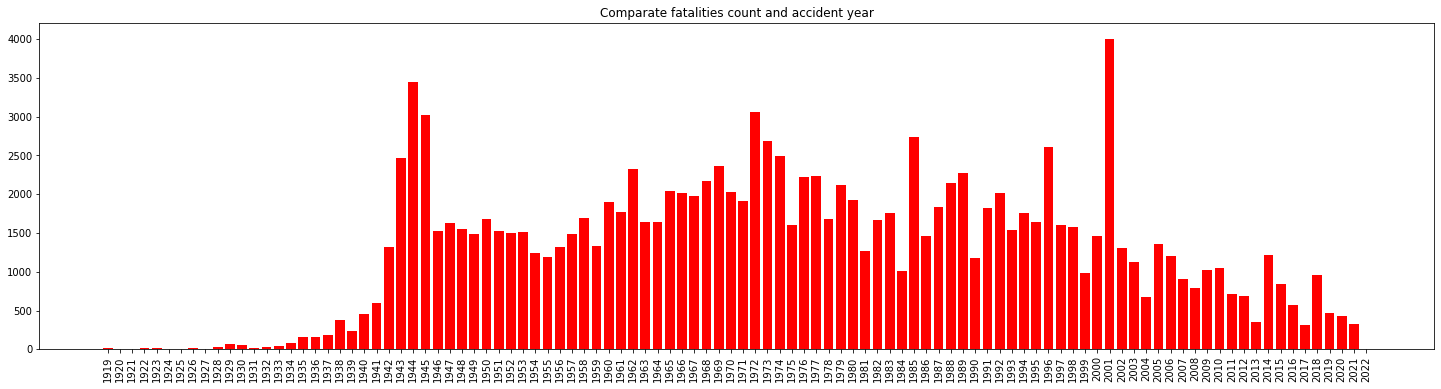

In [56]:
bar_count_plot(df_total_fatalities, 'Comparate fatalities count and accident year')

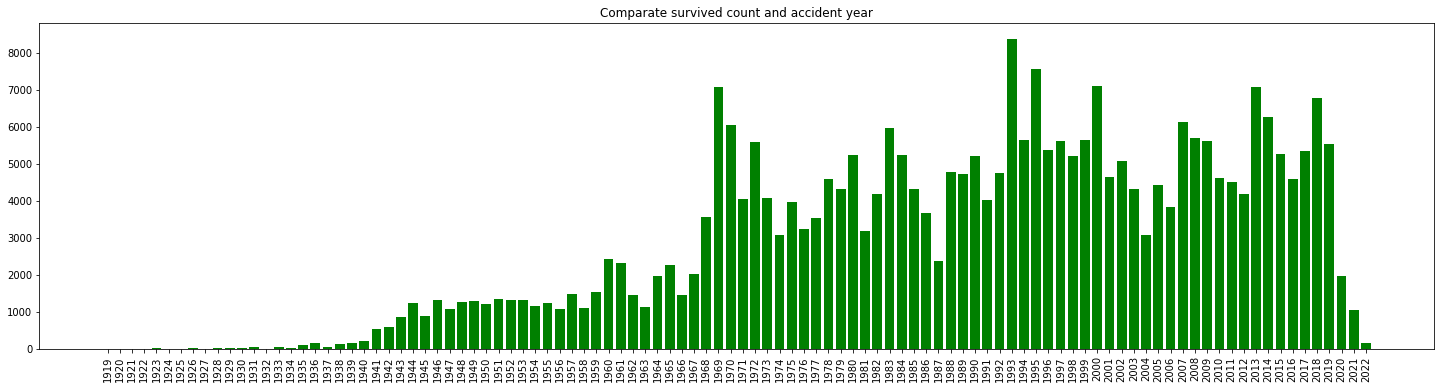

In [57]:
bar_count_plot(df_total_survived, 'Comparate survived count and accident year', 'Green')

In [58]:
df_merge_difkey = pd.merge(df_total_fatalities, df_total_survived, left_on='Incident_Year', right_on='Incident_Year')
df_merge_difkey = df_merge_difkey.rename(columns={'count_x': 'fatalities', 'count_y': 'survived'})
df_merge_difkey.head(10)

,Incident_Year,fatalities,survived
0,2022,2,170
1,2021,330,1058
2,2020,430,1992
3,2019,471,5549
4,2018,963,6796
5,2017,317,5359
6,2016,567,4607
7,2015,840,5266
8,2014,1219,6267
9,2013,355,7079


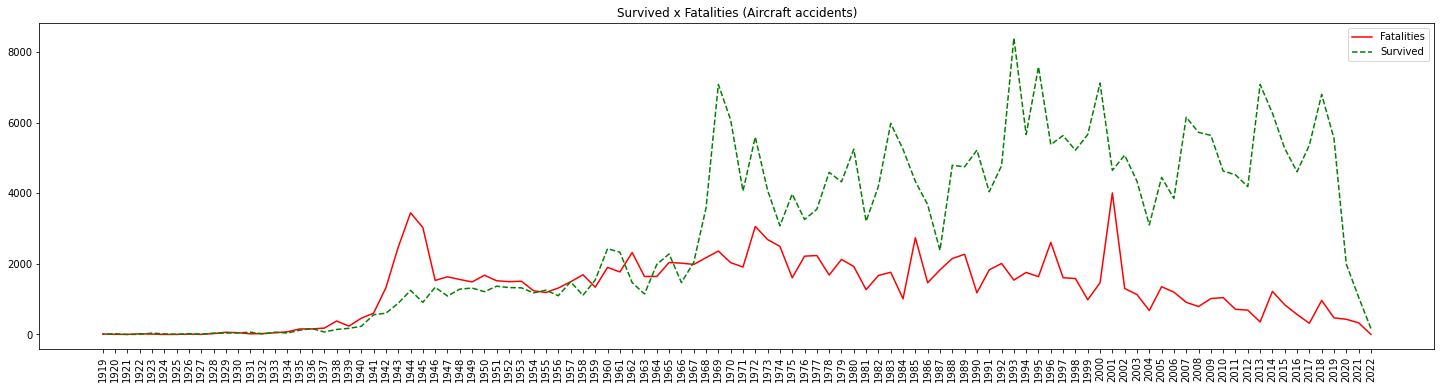

In [59]:
plt.subplots(figsize=(25, 6))
plt.plot(df_merge_difkey["Incident_Year"], df_merge_difkey["fatalities"], color="Red", label="Fatalities", linestyle="-")
plt.plot(df_merge_difkey["Incident_Year"], df_merge_difkey["survived"], color="Green", label="Survived", linestyle="--")
plt.xticks(rotation=90)
plt.gca().invert_xaxis()
plt.title("Survived x Fatalities (Aircraft accidents)")
plt.legend()
plt.show()

**Insight**
As the times gone by the survival rate increases as the technology get more advanced and pilots are trained properly to counter any situation or mayday that happen during the flight. At the same time fatalities also gone down which is quite a good news as lives is precious.



# Conclusion

After analysing and visualizing our dataset we have came to our conclusion with some important insights listed below:-

* As time passes and number of operational flights increases, number of fatalities also increases with time.
* During 1940 to 1945, military aircraft accidents were the highest due to world war-II that was taken place at that time.
* On Friday there were highest incidents take place while on Sunday, the least incidents take place.
* Aircraft model Junkers Ju-52/3m, followed by Douglas C-47-DL (DC-3) gone through highest accidents.
* Aircraft model Douglas C-47A-20-DK (DC-3) gone through least accidents.
* 2 Pratt Whitney R-1830-92  were the engines of aircraft that were gone under incident followed by earlier model of same engine 2 Pratt Whitney R-1830-90C.
* Miami International Airport, FL, United States of America is the busiest airport with most number of take-offs and landings.
* Rio de Janeiro-Santos Dumont Airport, RJ (SDU/SBRJ) , Brazil is least in terms of departure while Da Nang Airport (DAD/VVDN) , Vietnam is least in terms of destination airport.
* United States Army Air Forces lost the most aircraft.
* The accident is the main reason behind the most life losses and the count is quite high as compared to next reason. 
* Criminal activities are second activity as these are took place to result in loss of lives of passengers.
* Fatal incidents are low as compared to non-fatal incident.
* Most military planes are damaged beyond repair, crew on these planes have lost their lives.
* The phase of flight of military incidents which result in fatal and non-fatal count, the highest count is unknown


Although the count of fatal incident was quite high in 1940s but as technology advances and more rules and guidelines have been framed and how fast the changes implemented from the lesson learned from past incidents result in lowering of fatal incidents and survived rates increases and as more technology advances one day we can hope that this count even comes to 0 and that will be the day the trued advancement achieve in this industry.